# PORTADA

**Análisis del comportamiento monetario de los usuarios de Cookie Blast**

*Luana Marotti*

Especialista de Análisis de Datos 2

## Indice
1. Planteamiento del problema
2. Objetivo general  
2.1. Objetivos específicos
3. Hipótesis
4. Base de datos  
4.1. Descripción de las variables
5. Análisis
6. Contrastación de hipótesis y demostración de resultados  
6.1. Comparación ganancias generadas  
6.2. Comparación cantidad de transacciones y promedio radio entre usuarios que gastan y usuarios totales  
6.3. Comparación eficiencia de las transacciones realizadas  
6.4. Comparación promedio de gasto y promedio de transacciones por usuario que gasta  
6.5. Comparación según la calidad de usuarios  
7. Principales conclusiones

# 1. Planteamiento del problema

La empresa tiene como objetivo principal la optimización de las ganancias, por lo que la adecuada comprensión del comportamiento de 
los usuarios es esencial para poder elegir las mejores estrategias a implementar. A partir de los datos obtenidos durante el primer
semestre del año 2020, se busca analizar al consumidor y tomar decisiones para este año.

# 2. Objetivo general 

En marzo de 2022 se implementó un descuento importante en la mayor cantidad de las transacciones de Cookie Blast. 
El objetivo es analizar si esta  estrategia fue fructífera o no y si conviene repetirla en el siguiente semestre.

## 2.1. Objetivos específicos

1. Se busca maximizar ganancias, por lo tanto el primer punto a analizar corresponde a los ingresos mensuales.
El objetivo es comparar las ganancias generadas en marzo con las de los otros meses.
2. Además de las ganancias, existen otras variables útiles a ser analizadas para concluir si la estrategia fue beneficiosa o no.
El objetivo es comparar las transacciones totales de marzo con las de los otros meses, y el promedio del radio entre usuarios que gastan y el total de usuarios.
3. Se busca también analizar la eficiencia de cada una de las transacciones realizadas.
Por lo tanto, otro objetivo es comparar el promedio de gasto por transacción en marzo y el de los otros meses.
4. Otra forma de considerar la efiencia es con el promedio de gasto y promedio de transacciones por usuario que gasta. 
El objetivo es comparar ambos indicadores entre marzo y el resto de los meses.
5. La calidad de los usuarios también proporciona información importante para conocer donde enfocar los posibles descuentos.
Se busca comparar la distribución de jugadores y la distribución de ganancias de acuerdo al tipo de jugador en marzo y el resto de los meses.

# 3. Hipótesis

1. **H0:** La ganancia total generada en marzo es superior a la de cualquiera de los otros meses por al menos 5%.  
   **H1:** La ganancia total generada en marzo no es superior a la de los otros meses por al menos 5%.
2. **H0:** La cantidad total de transacciones en marzo es superior a la de cualquiera de los otros meses por al menos 5%.
       El promedio del radio entre usuarios que gastan y usuarios totales en marzo es superior al de los otros meses.   
   **H2:** La cantidad total de transacciones en marzo no es superior a la de los otros meses por al menos 5%.
       El promedio del radio entre usuarios que gastan y usuarios totales en marzo no es superior al de los otros meses.  
3. **H0:** La eficiencia de las transacciones en marzo es inferior al de cualquiera de los otros meses.  
   **H3:** La eficiencia de las transacciones en marzo no es inferior al de cualquiera de los otros meses.
4. **H0:** El promedio de gasto y promedio de transacciones por usuario que gasta en marzo es superior al de cualquiera de los otros meses.   
   **H4:** El promedio de gasto y promedio de transacciones por usuario que gasta en marzo no es superior al de los otros meses.
5. **H0:** La distribución de jugadores es igual en cualquiera de los meses. Los High Value Player representan la mayor cantidad de las ganancias.  
   **H5:** La distribución de jugadores en marzo es distinta a la de los otros meses. Los High Value Player no representan la mayor cantidad de las ganancias.

# 4. Base de datos

La base de datos corresponde a información recolectada por la empresa a través de la aplicación Cookie Blast. La misma corresponde a información acerca de los usuarios durante el primer semestre de 2020. [link dataset](https://github.com/luanamarottik/Entrega-EAD2/blob/2ab407b954f2a67fccd99d3e79bc495c1356ca67/Data_02.csv)

## 4.1. Descripción de las variables

**Descripción de las variables:**  
1.	**DAU:** Daily Active User. Cantidad de usuarios que ingresaron a la aplicación durante ese día  
2. **Spender_DAU:** Cantidad de usuarios que ingresaron a la aplicación y gastaron dinero durante ese día  
3.	**IAP_Revenue:** In-app purchase revenue. Cantidad de dinero en USD dólares que ingreso a la companía mediante los usuarios en cuestión durante ese día  
4.	**Transactions:** Cantidad de transacciones realizadas por los usuarios en cuestión durante ese día  
5.	**User_Type:** Calidad de los usuarios que ingresaron a la aplicación durante ese día (= NonPayer si no realizaron ninguna transacción; =LowValuePayer si realizaron por lo menos una transacción pero no alcanzan una cantidad mínima de gasto monetario por usuario; =HighValuePayer si realizaron por lo menos una transacción y alcanzan una cantidad mínima de gasto monetario por usuario)  
6.	**Average_spent_per_spender_DAU:** IAP_Revenue/Spender_DAU  
7.	**Average amount of transactions per spender_DAU:** Transactions/Spender_DAU  
8.	**Average spent per transaction:** IAP_Revenue/Transactions  
9.	**Spender_DAU_DAU:** Ratio entre los usuarios gastadores y el total de usuarios   

# 5. Análisis

A partir de las primeras 5 variables, se generan otros indicadores de interés.
Luego se hace la comparación entre marzo y el resto de los meses como se detalla a continuación.

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
#Abro archivos
path_to_file="Data_02.csv"

data=[]

with open(path_to_file, 'r',encoding='utf8') as path_to_file:
    reader=csv.reader(path_to_file)
    for row in reader:
        data.append(row[:])

#Cambio el nombre de los meses y convierto los números a integer
for i in range(1,len(data),1):
    data[i][1]=data[i][1].replace('1','Enero').replace('2','Febrero').replace('3','Marzo').replace('4','Abril').replace('5','Mayo').replace('6','Junio')
for i in range(1,len(data),1):
    for j in range(3,7,1):
        data[i][j]=int(data[i][j].replace(',','').replace('$',''))
        
#Convierto a un DataFrame y elimino las filas repetidas
df=pd.DataFrame(data, columns=data[0])
df.drop(index=0)

,year,month,date,DAU,Spender_DAU,IAP_Revenue,Transactions,User_Type
1,2020,Enero,7,328333,0,0,0,NonPayer
2,2020,Enero,8,324512,0,0,0,NonPayer
3,2020,Enero,9,334628,0,0,0,NonPayer
4,2020,Enero,10,320760,0,0,0,NonPayer
5,2020,Enero,11,336221,0,0,0,NonPayer
...,...,...,...,...,...,...,...,...
524,2020,Junio,26,59015,5299,52055,7074,Low_Value_Payer
525,2020,Junio,27,60968,5476,51075,7794,Low_Value_Payer
526,2020,Junio,28,59910,5502,52467,7301,Low_Value_Payer
527,2020,Junio,29,60688,5289,48719,7721,Low_Value_Payer


In [3]:
#Creo un DataFrame con los valores totales del Dataframe principal
months=['Enero','Febrero','Marzo','Abril','Mayo','Junio']
dict_month={}
for month in months:
    dict_month[month]=[0,0,0,0]
    for i in range(0,len(df),1):
        if df['month'][i]==month:
            dict_month[month][0]=dict_month[month][0]+df['DAU'][i]
            dict_month[month][1]=dict_month[month][1]+df['Spender_DAU'][i]
            dict_month[month][2]=dict_month[month][2]+df['IAP_Revenue'][i]
            dict_month[month][3]=dict_month[month][3]+df['Transactions'][i]
df_resumen=pd.DataFrame(dict_month).transpose()
df_resumen.columns=['DAU','Spender_DAU','IAP_Revenue','Transactions']
df_resumen

,DAU,Spender_DAU,IAP_Revenue,Transactions
Enero,10028012,182946,2563907,304317
Febrero,10931572,204522,2984014,339538
Marzo,11393391,222225,3196187,371253
Abril,11315203,209584,3069117,349408
Mayo,12320226,214148,2954235,354427
Junio,12002793,199909,2951856,328344


In [4]:
#Agrego otras columnas de interés al DataFrame
Average_spent_per_spender_DAU=[]
Average_amount_of_transactions_per_spender_DAU=[]
Average_spent_per_transaction=[]
Spender_DAU_DAU=[]

for month in months:
    Average_spent_per_spender_DAU.append(round(df_resumen['IAP_Revenue'][month]/df_resumen['Spender_DAU'][month],2))
    Average_amount_of_transactions_per_spender_DAU.append(round(df_resumen['Transactions'][month]/df_resumen['Spender_DAU'][month],2))
    Average_spent_per_transaction.append(round(df_resumen['IAP_Revenue'][month]/df_resumen['Transactions'][month],2)) 
    Spender_DAU_DAU.append(round(df_resumen['Spender_DAU'][month]*100/df_resumen['DAU'][month],2))

df_resumen['Average_spent_per_spender_DAU']=Average_spent_per_spender_DAU
df_resumen['Average_amount_of_transactions_per_spender_DAU']=Average_amount_of_transactions_per_spender_DAU
df_resumen['Average_spent_per_transaction']=Average_spent_per_transaction
df_resumen['Spender_DAU_DAU']=Spender_DAU_DAU

#Agrego la comparación de cada uno de esos datos entre marzo y cada mes al DataFrame
Difference_IAP_Revenue=[]
Difference_Transactions=[]
Difference_Average_spent_per_spender_DAU=[]
Difference_Average_amount_of_transactions_per_spender_DAU=[]
Difference_Average_spent_per_transaction=[]
Difference_Spender_DAU_DAU=[]

for i in range(0,len(months),1):
    Difference_IAP_Revenue.append(round((df_resumen['IAP_Revenue'][2]-df_resumen['IAP_Revenue'][i])*100/df_resumen['IAP_Revenue'][i],0))
    Difference_Transactions.append(round((df_resumen['Transactions'][2]-df_resumen['Transactions'][i])*100/df_resumen['Transactions'][i],0))
    Difference_Average_spent_per_spender_DAU.append(round((Average_spent_per_spender_DAU[2]-Average_spent_per_spender_DAU[i])*100/Average_spent_per_spender_DAU[i],0))
    Difference_Average_amount_of_transactions_per_spender_DAU.append(round((Average_amount_of_transactions_per_spender_DAU[2]-Average_amount_of_transactions_per_spender_DAU[i])*100/Average_amount_of_transactions_per_spender_DAU[i],0))
    Difference_Average_spent_per_transaction.append(round((Average_spent_per_transaction[2]-Average_spent_per_transaction[i])*100/Average_spent_per_transaction[i],0))
    Difference_Spender_DAU_DAU.append(round((Spender_DAU_DAU[2]-Spender_DAU_DAU[i])/Spender_DAU_DAU[i]*100,0))

df_resumen['Difference_IAP_Revenue']=Difference_IAP_Revenue
df_resumen['Difference_Transactions']=Difference_Transactions
df_resumen['Difference_Average_spent_per_spender_DAU']=Difference_Average_spent_per_spender_DAU
df_resumen['Difference_Average_amount_of_transactions_per_spender_DAU']=Difference_Average_amount_of_transactions_per_spender_DAU
df_resumen['Difference_Average_spent_per_transaction']=Difference_Average_spent_per_transaction
df_resumen['Difference_Spender_DAU_DAU']=Difference_Spender_DAU_DAU

#Agrego la fila month para poder graficar
df_resumen['Month']=df_resumen.index

df_resumen

,DAU,Spender_DAU,IAP_Revenue,Transactions,Average_spent_per_spender_DAU,Average_amount_of_transactions_per_spender_DAU,Average_spent_per_transaction,Spender_DAU_DAU,Difference_IAP_Revenue,Difference_Transactions,Difference_Average_spent_per_spender_DAU,Difference_Average_amount_of_transactions_per_spender_DAU,Difference_Average_spent_per_transaction,Difference_Spender_DAU_DAU,Month
Enero,10028012,182946,2563907,304317,14.01,1.66,8.43,1.82,25.0,22.0,3.0,1.0,2.0,7.0,Enero
Febrero,10931572,204522,2984014,339538,14.59,1.66,8.79,1.87,7.0,9.0,-1.0,1.0,-2.0,4.0,Febrero
Marzo,11393391,222225,3196187,371253,14.38,1.67,8.61,1.95,0.0,0.0,0.0,0.0,0.0,0.0,Marzo
Abril,11315203,209584,3069117,349408,14.64,1.67,8.78,1.85,4.0,6.0,-2.0,0.0,-2.0,5.0,Abril
Mayo,12320226,214148,2954235,354427,13.80,1.66,8.34,1.74,8.0,5.0,4.0,1.0,3.0,12.0,Mayo
Junio,12002793,199909,2951856,328344,14.77,1.64,8.99,1.67,8.0,13.0,-3.0,2.0,-4.0,17.0,Junio


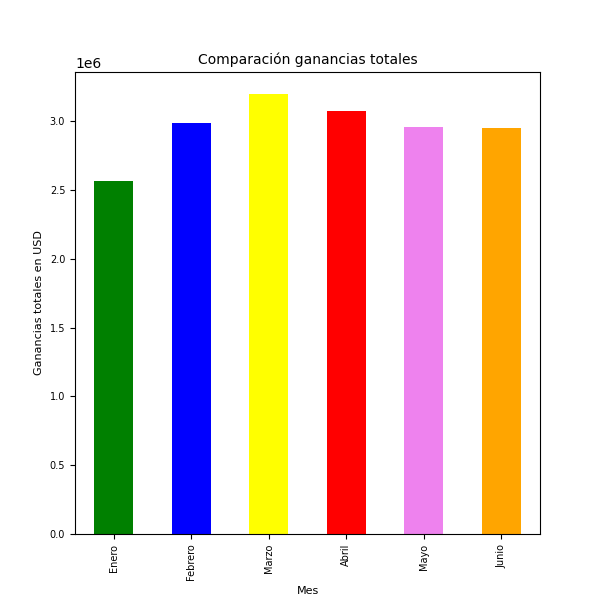

In [5]:
#Gráfica de ganancia total según el mes
colors=['green','blue','yellow','red','violet','orange']
df_resumen.plot(x='Month', y='IAP_Revenue', fontsize=7, kind='bar', color=colors, figsize=(6,6), legend=False)
plt.title('Comparación ganancias totales',size=10)
plt.xlabel('Mes',size=8)
plt.ylabel('Ganancias totales en USD',size=8)
plt.show()

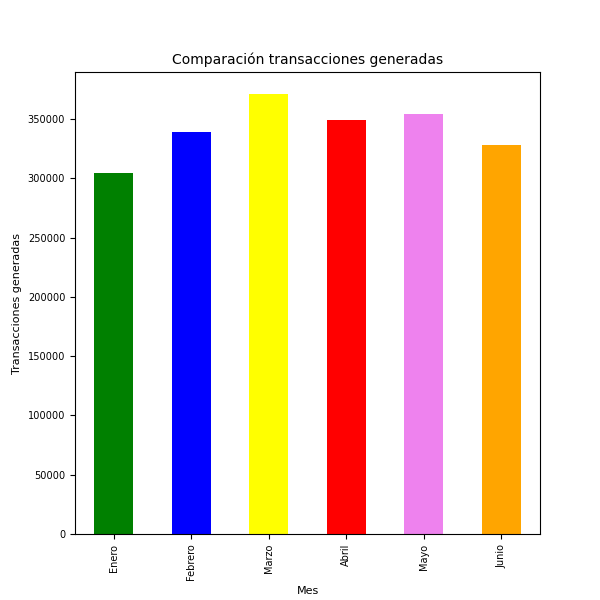

In [6]:
#Gráfica de cantidad de transacciones según el mes
df_resumen.plot(x='Month', y='Transactions', fontsize=7, kind='bar', color=colors, figsize=(6,6),legend=False)
plt.title('Comparación transacciones generadas',size=10)
plt.xlabel('Mes',size=8)
plt.ylabel('Transacciones generadas',size=8)
plt.show()

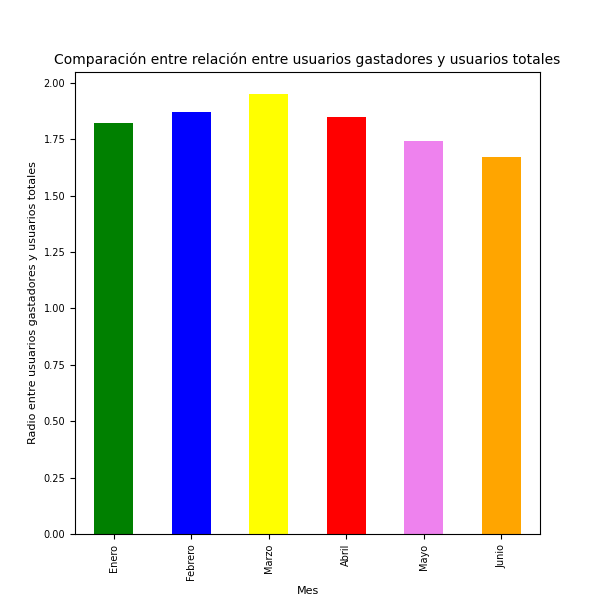

In [7]:
#Gráfica de radio entre usuarios gastadores y usuarios totales según el mes en cuestión
df_resumen.plot(x='Month', y='Spender_DAU_DAU', fontsize=7, kind='bar', color=colors, figsize=(6,6),legend=False)
plt.title('Comparación entre relación entre usuarios gastadores y usuarios totales',size=10)
plt.xlabel('Mes',size=8)
plt.ylabel('Radio entre usuarios gastadores y usuarios totales',size=8)
plt.show()

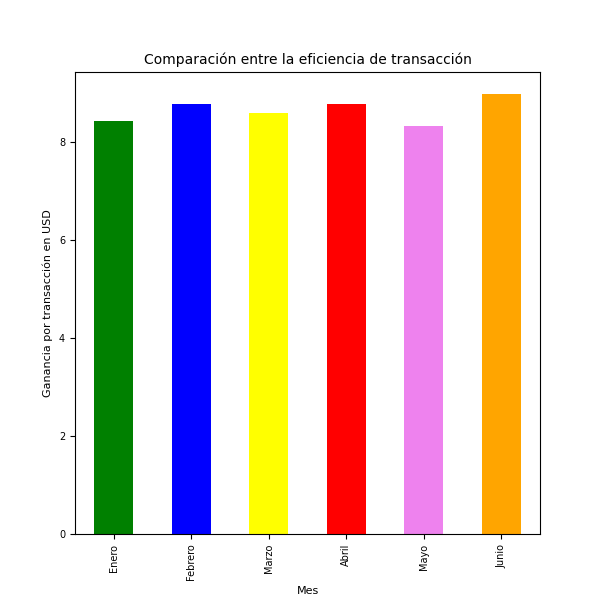

In [8]:
#Gráfica de eficiencia de transacción según el mes en cuestión
df_resumen.plot(x='Month', y='Average_spent_per_transaction', fontsize=7, kind='bar', color=colors, figsize=(6,6),legend=False)
plt.title('Comparación entre la eficiencia de transacción',size=10)
plt.xlabel('Mes',size=8)
plt.ylabel('Ganancia por transacción en USD',size=8)
plt.show()

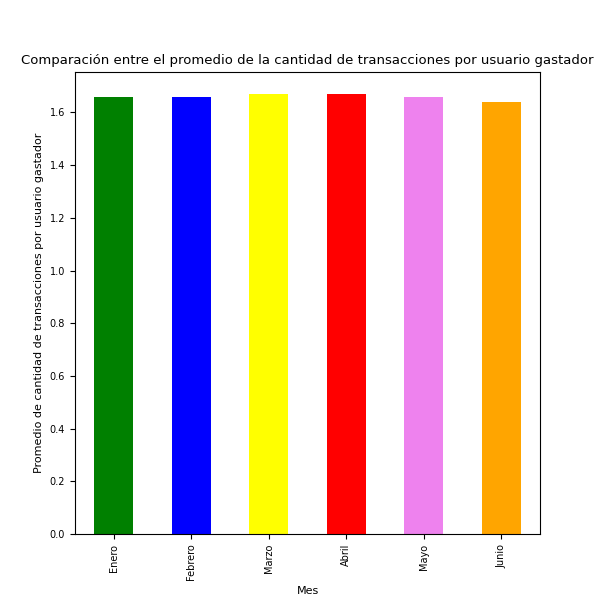

In [9]:
#Gráfica de eficiencia del promedio de la cantidad de transacciones por usuario gastador
df_resumen.plot(x='Month', y='Average_amount_of_transactions_per_spender_DAU', fontsize=7, kind='bar', color=colors, figsize=(6,6),legend=False)
plt.title('Comparación entre el promedio de la cantidad de transacciones por usuario gastador',size=9.5)
plt.xlabel('Mes',size=8)
plt.ylabel('Promedio de cantidad de transacciones por usuario gastador',size=8)
plt.show()

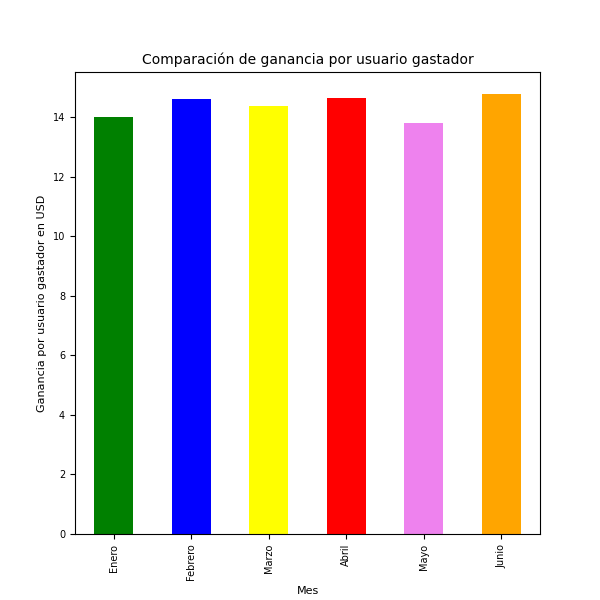

In [10]:
#Gráfica de ganancia por usuario gastador
colors=['green','blue','yellow','red','violet','orange']
df_resumen.plot(x='Month', y='Average_spent_per_spender_DAU', fontsize=7, kind='bar', color=colors, figsize=(6,6),legend=False)
plt.title('Comparación de ganancia por usuario gastador',size=10)
plt.xlabel('Mes',size=8)
plt.ylabel('Ganancia por usuario gastador en USD',size=8)
plt.show()

In [11]:
#Obtengo un Dataframe con las distribuciones de las transacciones y las ganancias totales de acuedo a la calidad del usuario
user_types=['NonPayer','Low_Value_Payer','High_Value_Payer','Total','TotalPayers']
user_types_2=['NonPayer','Low_Value_Payer','High_Value_Payer']
months_2=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Total']
dict_user_type={}
list_user_type=[]

for month in months_2:
    dict_user_type[month]={}
    for user_type in user_types:
        dict_user_type[month][user_type]=[0,0,0]
        for i in range(1,len(df),1):
            if month == df['month'][i]:
                if user_type == 'Total':
                    dict_user_type[month][user_type][0]=dict_user_type[month][user_type][0]+df['DAU'][i]
                    dict_user_type[month][user_type][1]=dict_user_type[month][user_type][1]+df['IAP_Revenue'][i]
                elif user_type == 'TotalPayers':
                    if df['User_Type'][i] != 'NonPayer':
                        dict_user_type[month][user_type][0]=dict_user_type[month][user_type][0]+df['DAU'][i]
                elif user_type == df['User_Type'][i]:
                    dict_user_type[month][user_type][0]=dict_user_type[month][user_type][0]+df['DAU'][i]
                    dict_user_type[month][user_type][1]=dict_user_type[month][user_type][1]+df['IAP_Revenue'][i]
            if month == 'Total':
                if user_type == 'Total':
                    dict_user_type['Total'][user_type][0]=dict_user_type['Total'][user_type][0]+df['DAU'][i]
                    dict_user_type['Total'][user_type][1]=dict_user_type['Total'][user_type][1]+df['IAP_Revenue'][i]
                elif user_type == 'TotalPayers':
                    if df['User_Type'][i] != 'NonPayer':
                        dict_user_type[month][user_type][0]=dict_user_type[month][user_type][0]+df['DAU'][i]
                elif user_type == df['User_Type'][i]:
                    dict_user_type['Total'][user_type][0]=dict_user_type['Total'][user_type][0]+df['DAU'][i]
                    dict_user_type['Total'][user_type][1]=dict_user_type['Total'][user_type][1]+df['IAP_Revenue'][i]
    for user_type in user_types_2:
        if user_type != 'NonPayer':    
            dict_user_type[month][user_type][2]=round(dict_user_type[month][user_type][0]*100/dict_user_type[month]['TotalPayers'][0],0)
        dict_user_type[month][user_type][0]=round(dict_user_type[month][user_type][0]*100/dict_user_type[month]['Total'][0],0)
        dict_user_type[month][user_type][1]=round(dict_user_type[month][user_type][1]*100/dict_user_type[month]['Total'][1],0)
        list_user_type.append([month,user_type,dict_user_type[month][user_type][0],dict_user_type[month][user_type][1],dict_user_type[month][user_type][2]])
df_user_type=pd.DataFrame(list_user_type, columns=['Month','User_type','Percentage_DAU','Percentage_revenue','Percentage_DAU_OnlyPayers'])
df_user_type

,Month,User_type,Percentage_DAU,Percentage_revenue,Percentage_DAU_OnlyPayers
0,Enero,NonPayer,82.0,0.0,0.0
1,Enero,Low_Value_Payer,15.0,49.0,80.0
2,Enero,High_Value_Payer,4.0,51.0,20.0
3,Febrero,NonPayer,81.0,0.0,0.0
4,Febrero,Low_Value_Payer,15.0,50.0,79.0
5,Febrero,High_Value_Payer,4.0,50.0,21.0
6,Marzo,NonPayer,80.0,0.0,0.0
7,Marzo,Low_Value_Payer,16.0,49.0,80.0
8,Marzo,High_Value_Payer,4.0,51.0,20.0
9,Abril,NonPayer,81.0,0.0,0.0


In [12]:
#Obtengo un DataFrame con las distribuciones de usuarios que realizan al menos una transacción
for i in range(0,len(df_user_type),1):
    if df_user_type['User_type'][i] == 'NonPayer':
       df_user_type=df_user_type.drop(index=i)
df_user_type

,Month,User_type,Percentage_DAU,Percentage_revenue,Percentage_DAU_OnlyPayers
1,Enero,Low_Value_Payer,15.0,49.0,80.0
2,Enero,High_Value_Payer,4.0,51.0,20.0
4,Febrero,Low_Value_Payer,15.0,50.0,79.0
5,Febrero,High_Value_Payer,4.0,50.0,21.0
7,Marzo,Low_Value_Payer,16.0,49.0,80.0
8,Marzo,High_Value_Payer,4.0,51.0,20.0
10,Abril,Low_Value_Payer,15.0,49.0,80.0
11,Abril,High_Value_Payer,4.0,51.0,20.0
13,Mayo,Low_Value_Payer,15.0,50.0,80.0
14,Mayo,High_Value_Payer,4.0,50.0,20.0


# 6. Contrastación de hipótesis y demostración de resultados

## 6.1. Comparación ganancias generadas

|Mes|Ganancia(USD)|Porcentaje diferencia|  
|:-:|:-:|:-:|  
|Enero|2.563.905|25%|
|Febrero|2.984.010|7%|  
|Marzo|3.196.185|0%|  
|Abril|3.069.114|4%|  
|Mayo|2.954.233|8%|  
|Junio|2.951.859|8%|  
|Promedio|2.904.624|10%|  


Como se puede observar en la tabla, en el mes de marzo se obtuvieron ganancias superiores al resto de los meses.  
Sin embargo, no se cumple la hipótesis de que las mismas sean mayor a las de cualquier otro mes por un 5%.  
En el mes de marzo se obtuvieron 3.196.185 USD, seguido por abril con 3.069.114 USD. En este caso, solo hay una diferencia de 4%.  
Comparando marzo con el resto de los meses, se puede asegurar que las ganancias son superiores por al menos 5%.  
Además, se puede asegurar que las ganancias generadas en marzo son mayores al promedio de las ganancias generadas en el resto de los meses por al menos 10%.

## 6.2. Comparación cantidad de transacciones y promedio radio entre usuarios que gastan y usuarios totales

|Mes|Transacciones|Porcentaje diferencia|  
|:-:|:-:|:-:|  
|Enero|304.317|22%|
|Febrero|339.538|9%|  
|Marzo|371.253|0%|  
|Abril|449.408|6%|  
|Mayo|354.427|5%|  
|Junio|328.344|13%|  
|Promedio|335.207|11%| 


Como se puede observar en la tabla, en el mes de marzo se obtuvo una cantidad de transacciones superior al resto de los meses por al menos 5%. Por lo tanto, se cumple la hipótesis realizada.  
Además, se puede asegurar que la cantidad de transacciones realizadas en marzo es mayor al promedio de las del resto de los meses por al menos 10%.

|Mes|Radio usuarios gastadores/total usuarios|Porcentaje diferencia|  
|:-:|:-:|:-:|  
|Enero|1,82%|7%|
|Febrero|1,87%|4%|  
|Marzo|1,95%|0%|  
|Abril|1,85%|5%|  
|Mayo|1,74%|12%|  
|Junio|1,67%|17%|  
|Promedio|1,79%|9%| 


Como se puede observar en la tabla, el mes de marzo se alcanza la mayor eficiencia obtenida en comparación con otros meses.   
Por lo tanto, se acepta la hipótesis nula.

## 6.3. Comparación eficiencia de las transacciones realizadas

|Mes|Promedio ganancia por transacción|Porcentaje diferencia|  
|:-:|:-:|:-:|  
|Enero|8,43 USD|2%|
|Febrero|8,79 USD|-2%|  
|Marzo|8,61 USD|0%|  
|Abril|8,78 USD|-2%|  
|Mayo|8,34 USD|3%|  
|Junio|8,99 USD|-4%|  
|Promedio|8,67 USD|-1%|

Como se puede observar en la tabla, el mes de marzo no alcanza la mayor eficiencia de transacción obtenida en comparación con otros meses. 
Al existir un descuento en las transacciones, se espera que las mismas sean menos costosas y por lo tanto la eficiencia de transacción sea menor.
Sin embargo, no es el mes con menor promedio de ganancia por transacción. Tanto en enero como en mayo se alcanza un valor menor.   
Se puede concluir que a pesar de que cada una de las transacciones se encuentre más barata, los usuarios aprovechan para realizar las de mayor valor.
En consecuencia, se rechaza la hipótesis nula.

## 6.4. Comparación promedio de gasto y promedio de transacciones por usuario que gasta

|Mes|Promedio de gasto por usuario gastador|Porcentaje diferencia|  
|:-:|:-:|:-:|  
|Enero|14,01 USD|3%|
|Febrero|14,59 USD|-1%|  
|Marzo|14,38 USD|0%|  
|Abril|14,64 USD|-2%|  
|Mayo|13,8 USD|4%|  
|Junio|14,77 USD|-3%|  
|Promedio|14,36 USD|0%|

Como se puede observar en la tabla, existe muy poca variación en el promedio de gasto por usuario gastador entre un mes y el otro.
Además, se señala que marzo se comporta de la misma forma que el promedio del resto de los meses. En otras palabras, no se destaca por tener un desempeño particular respecto al indicador en cuestión.
En conclusión, se rechaza la hipótesis nula.


|Mes|Promedio transacciones por usuario gastador|Porcentaje diferencia|  
|:-:|:-:|:-:|  
|Enero|1,66|1%|
|Febrero|1,66|1%|  
|Marzo|1,67|0%|  
|Abril|1,67|0%|  
|Mayo|1,66|1%|  
|Junio|1,64|2%|  
|Promedio|1,66|1%|

Como se puede observar en la tabla, existe muy poca variación en la cantidad de transacciones realizadas por usuario gastador entre un mes y el otro.
Sin embargo, cabe destacar que marzo es el mes con mayor promedio de transacciones por usuario gastador.
Por lo tanto, se confirma la hipótesis nula.
El resultado obtenido es el esperado dado que el usuario aprovecha a realizar mayor cantidad de transacciones porque con descuento el precio es menor al habitual.

## 6.5. Comparación según la calidad de usuarios

Primero analizamos la distribución de la calidad de jugadores según la cantidad de usuarios activos como se muestra en la siguiente tabla.

Month|High Value Payer|Low Value Payer|Non Payer|
|:-:|:-:|:-:|:-:|
Enero|4%|15%|82%|
Febrero|4%|15%|81%|
Marzo|4%|16%|80%|
Abri|4%|15%|81%|
Mayo|4%|15%|81%|
Junio|4%|15%|81%|
Total|4%|15%|81%|

A partir de la tabla podemos concluir que hay una pequeña diferencia entre marzo y el resto de los meses, en donde el porcentaje de jugadores que no realizan transacciones disminuyó. Algunos jugadores que anteriormente no realizaban transaccinoes comenzaron a realizar por lo menos una transacción pero sin alcanzar un mínimo valor para ser consideramos High Value Payers.
Por lo tanto, se confirma la hipótesis nula.
  
  
Si solo se tiene en consideración los usuarios que gastan dinero, se puede analizar la distribución como se muestra en la siguiente tabla.

Month|High Value Payer|Low Value Payer|
|:-:|:-:|:-:|
Enero|20%|80%|
Febrero|21%|79%|
Marzo|20%|80%|
Abri|20%|80%|
Mayo|20%|80%|
Junio|20%|80%|
Total|20%|80%|

Se puede observar que la distribución de marzo es igual a la del resto de los meses.
  
En la siguiente tabla se considera la distribución de ganancias de acuerdo a la calidad de los jugadores.

Month|High Value Payer|Low Value Payer|
|:-:|:-:|:-:|
Enero|51%|49%|
Febrero|50%|50%|
Marzo|51%|49%|
Abri|51%|49%|
Mayo|50%|50%|
Junio|53%|47%|
Total|51%|49%|

Se puede observar que hay pequeñas variaciones entre un mes y otro, pero el caso de marzo es igual al promedio de los otros meses.  
Por lo tanto, se considera que no existe variación en esta distribución y se descarta la hipótesis nula.

# 7. Principales conclusiones

- El descuento de marzo tuvo como resultado el aumento del radio entre usuarios gastadores y usuarios totales.
- Como consecuencia, aumentan el número de transacciones realizadas y de ganancias obtenidas. Las ganancias obtenidas y transacciones realizadas en marzo son superiores a las de cualquier otro mes, y son 10% más que el promedio de los otros meses.
- El promedio de gasto por usuario gastador de marzo es igual al promedio de los otros meses, y el promedio de transacciones realizadas por usuario gastador es el mayor. El precio de cada transacción era menor, por lo que el promedio de ganancia por transacción en marzo es de los más bajos. Como consecuencia de la disminución de precio, los usuarios pudieron realizar mayor cantidad de transacciones pero gastando la misma cantidad de dinero.
- El descuento no generó impacto en la distribución de jugadores que gastan mucho dinero y los que gastan poco dinero dado que marzo se comporta igual que los otros meses.
- Considerando las conclusiones mencionadas, se recomienda la estrategia de ofrecer descuentos en un mes del semestre.